## Machine Learning

### Training the models

In [2]:
# SET UP

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import pandas as pd
import numpy as np


# PLOTTING
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


### Calling the data

In [3]:
patents_features = pd.read_csv('patents_final_features.csv')

patents_features.head()

,patent_number,PK,TCT,CS,MF,TS,TSC,COL,INV,TAC,TKW,FC3,FC5,FC10,Category FC3,Category FC5,Category FC10,Category (FC3),Category (FC5),Category (FC10)
0,6672133,4.0,2000.0,1.0,250.0,4.0,4.0,0.0,4.0,6201.0,171.0,0.0,2.0,3.0,4.0,3.0,3.0,Nivel 4,Nivel 3,Nivel 3
1,6672143,4.0,1991.0,1.0,73.0,3.0,4.0,0.0,3.0,797.0,54.0,0.0,0.0,1.0,4.0,4.0,4.0,Nivel 4,Nivel 4,Nivel 4
2,6673332,4.0,1988.0,1.0,424.0,2.0,3.0,0.0,3.0,6201.0,758.0,0.0,0.0,0.0,4.0,4.0,4.0,Nivel 4,Nivel 4,Nivel 4
3,6673333,38.0,1993.0,1.0,424.0,1.0,2.0,0.0,3.0,6201.0,23.0,0.0,1.0,8.0,4.0,4.0,3.0,Nivel 4,Nivel 4,Nivel 3
4,6673334,11.0,1999.0,1.0,424.0,2.0,7.0,0.0,5.0,6201.0,1.0,1.0,1.0,3.0,4.0,4.0,3.0,Nivel 4,Nivel 4,Nivel 3


### Defining the dataset

In [97]:
#Defining Training Set
X=patents_features[['PK','TCT','MF','TS','TSC','COL','INV','TAC','TKW']]
y=patents_features[['Category FC3','Category FC5','Category FC10']]


#### Three years Forecast

1. Random Forests
2. Gradien Boost Ensemble
3. ANN

#### Random Forests

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
rnd_clf_3 = RandomForestClassifier(n_estimators=500,n_jobs=-1, random_state=0)
rnd_clf_3.fit(X_train, y_train['Category FC3'])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [99]:
y_pred_rnd_3= rnd_clf_3.predict(X)
print(rnd_clf_3.__class__.__name__,":",accuracy_score(y['Category FC3'], y_pred_rnd_3))

RandomForestClassifier : 0.9707631189468491


#### ANN

In [132]:
ann_clf_3 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(1000, 5), random_state=1)
ann_clf_3.fit(X, y['Category FC3'])

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1000, 5), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [133]:
print("Layers and iter")
print(ann_clf.n_layers_)
print(ann_clf.n_iter_)

Layers and iter
4
17


In [134]:
y_pred_ann_3=ann_clf_3.predict(X)
print(ann_clf_3.__class__.__name__,":",accuracy_score(y['Category FC3'], y_pred_ann_3))

MLPClassifier : 0.8178277464752162


#### Feature Importance for Rnd Forests

In [154]:
def plot_feature_importances(model,category):
 n_features = X.shape[1]
 plt.barh(range(n_features), model.feature_importances_, align='center',color=['#f5c284'])
 plt.yticks(np.arange(n_features), X,c='black')
 plt.title("Feature Importance for "+model.__class__.__name__+" : "+category)
 plt.xlabel("Feature importance")
 plt.ylabel("Feature")
 plt.savefig('featureImportances.png')


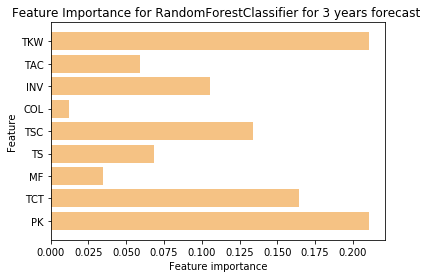

In [90]:
plot_feature_importances(rnd_clf_3," 3 years forecast ")


#### Five years Forecast

1. Random Forests
2. Gradien Boost Ensemble
3. ANN

Random Forests


In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
rnd_clf_5 = RandomForestClassifier(n_estimators=500,n_jobs=-1, random_state=0)
rnd_clf_5.fit(X_train, y_train['Category FC5'])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [136]:
y_pred_rnd_5= rnd_clf_5.predict(X)
print(rnd_clf_5.__class__.__name__,":",accuracy_score(y['Category FC5'], y_pred_rnd_5))

RandomForestClassifier : 0.9447459299457326


In [140]:
print(rnd_clf_5.feature_importances_)

[0.20232313 0.17084011 0.03761374 0.06738355 0.12997271 0.01303171
 0.10583916 0.0648666  0.20812928]


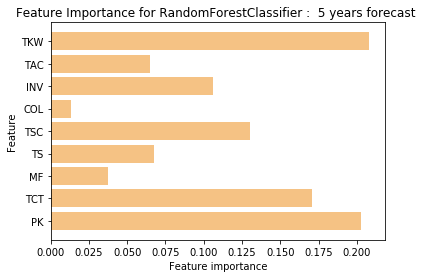

In [155]:
plot_feature_importances(rnd_clf_5," 5 years forecast ")


#### ANN

In [156]:
ann_clf_5 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(1000,5), random_state=1)
ann_clf_5.fit(X, y['Category FC5'])

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1000, 5), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [157]:
print("Layers and iter")
print(ann_clf_5.n_layers_)
print(ann_clf_5.n_iter_)

Layers and iter
4
18


In [158]:
y_pred_ann_5=ann_clf_5.predict(X)
print(ann_clf_5.__class__.__name__,":",accuracy_score(y['Category FC5'], y_pred_ann_5))

MLPClassifier : 0.6630488406512087


#### Ten years Forecast

1. Random Forests
2. Gradien Boost Ensemble
3. ANN

Random Forests


In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
rnd_clf_10 = RandomForestClassifier(n_estimators=500,n_jobs=-1, random_state=0)
rnd_clf_10.fit(X_train, y_train['Category FC10'])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [160]:
y_pred_rnd_10= rnd_clf_10.predict(X)
print(rnd_clf_10.__class__.__name__,":",accuracy_score(y['Category FC10'], y_pred_rnd_10))

RandomForestClassifier : 0.9205722742969906


In [161]:
print(rnd_clf_10.feature_importances_)

[0.18416137 0.16888317 0.03941691 0.06974129 0.1272394  0.01383307
 0.11589078 0.06941289 0.21142111]


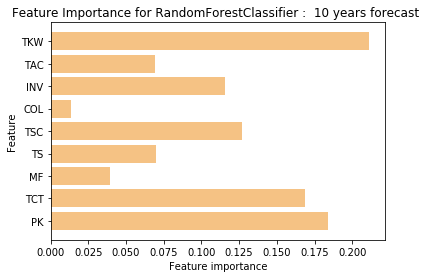

In [162]:
plot_feature_importances(rnd_clf_10," 10 years forecast ")

#### ANN

In [163]:
ann_clf_10 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(1000,5), random_state=1)
ann_clf_10.fit(X, y['Category FC5'])

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1000, 5), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [164]:
print("Layers and iter")
print(ann_clf_10.n_layers_)
print(ann_clf_10.n_iter_)

Layers and iter
4
18


In [165]:
y_pred_ann_10=ann_clf_10.predict(X)
print(ann_clf_10.__class__.__name__,":",accuracy_score(y['Category FC10'], y_pred_ann_10))

MLPClassifier : 0.4826681899618311
